Name: Dhruvi Shah

Student ID : 202211032

DL Assignment 5 

In [6]:
import tensorflow as tf
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import keras
from keras.models import Sequential
from keras.layers import Dense
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import train_test_split

#Heart Failure prediction dataset

In [2]:
data = pd.read_csv('heart (1).csv')
data.head()

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
0,40,M,ATA,140,289,0,Normal,172,N,0.0,Up,0
1,49,F,NAP,160,180,0,Normal,156,N,1.0,Flat,1
2,37,M,ATA,130,283,0,ST,98,N,0.0,Up,0
3,48,F,ASY,138,214,0,Normal,108,Y,1.5,Flat,1
4,54,M,NAP,150,195,0,Normal,122,N,0.0,Up,0


In [3]:
data.describe()

,Age,RestingBP,Cholesterol,FastingBS,MaxHR,Oldpeak,HeartDisease
count,918.000000,918.000000,918.000000,918.000000,918.000000,918.000000,918.000000
mean,53.510893,132.396514,198.799564,0.233115,136.809368,0.887364,0.553377
std,9.432617,18.514154,109.384145,0.423046,25.460334,1.066570,0.497414
min,28.000000,0.000000,0.000000,0.000000,60.000000,-2.600000,0.000000
25%,47.000000,120.000000,173.250000,0.000000,120.000000,0.000000,0.000000
50%,54.000000,130.000000,223.000000,0.000000,138.000000,0.600000,1.000000
75%,60.000000,140.000000,267.000000,0.000000,156.000000,1.500000,1.000000
max,77.000000,200.000000,603.000000,1.000000,202.000000,6.200000,1.000000


In [4]:
data.isnull().any()

Age               False
Sex               False
ChestPainType     False
RestingBP         False
Cholesterol       False
FastingBS         False
RestingECG        False
MaxHR             False
ExerciseAngina    False
Oldpeak           False
ST_Slope          False
HeartDisease      False
dtype: bool

EDA on heart failure dataset

(array([ 12.,  37.,  86., 104., 148., 201., 175., 101.,  39.,  15.]),
 array([28. , 32.9, 37.8, 42.7, 47.6, 52.5, 57.4, 62.3, 67.2, 72.1, 77. ]),
 <BarContainer object of 10 artists>)

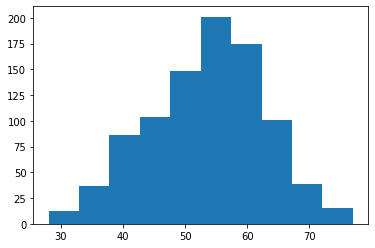

In [5]:
plt.hist(data.Age)

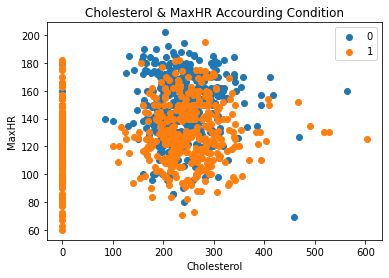

In [6]:
plt.scatter(data.Cholesterol[data.HeartDisease==0],data.MaxHR[data.HeartDisease==0])
plt.scatter(data.Cholesterol[data.HeartDisease==1],data.MaxHR[data.HeartDisease==1])
plt.xlabel("Cholesterol")
plt.ylabel("MaxHR")
plt.title("Cholesterol & MaxHR Accourding Condition")
plt.legend(data.HeartDisease)

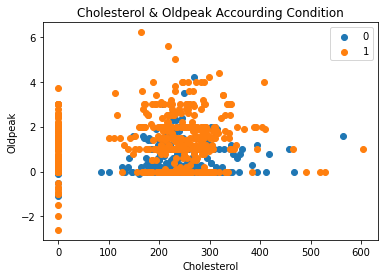

In [7]:
plt.scatter(data.Cholesterol[data.HeartDisease==0],data.Oldpeak[data.HeartDisease==0])
plt.scatter(data.Cholesterol[data.HeartDisease==1],data.Oldpeak[data.HeartDisease==1])
plt.xlabel("Cholesterol")
plt.ylabel("Oldpeak")
plt.title("Cholesterol & Oldpeak Accourding Condition")
plt.legend(data.HeartDisease)

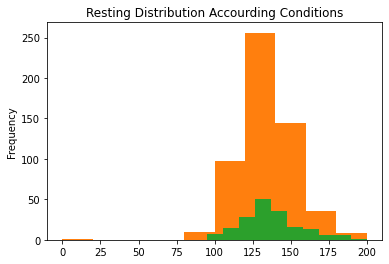

In [8]:
# RestingBP,RestingECG
data.RestingBP.groupby(data.RestingECG.values).plot(kind='hist',title='Resting Distribution Accourding Conditions');

In [9]:
import pandas as pd
from sklearn.preprocessing import LabelEncoder

# select the features that need to be encoded
cat_cols = ['Sex','ChestPainType','RestingECG','ST_Slope','ExerciseAngina']

# initialize the label encoder
le = LabelEncoder()

# apply label encoding to the categorical features
for col in cat_cols:
    data[col] = le.fit_transform(data[col])

# display the transformed dataset
print(data.head())

   Age  Sex  ChestPainType  RestingBP  Cholesterol  FastingBS  RestingECG  \
0   40    1              1        140          289          0           1   
1   49    0              2        160          180          0           1   
2   37    1              1        130          283          0           2   
3   48    0              0        138          214          0           1   
4   54    1              2        150          195          0           1   

   MaxHR  ExerciseAngina  Oldpeak  ST_Slope  HeartDisease  
0    172               0      0.0         2             0  
1    156               0      1.0         1             1  
2     98               0      0.0         2             0  
3    108               1      1.5         1             1  
4    122               0      0.0         2             0  


In [10]:
X = data.iloc[:,:11].values
y = data["HeartDisease"].values

In [11]:
print(X)

[[40.   1.   1.  ...  0.   0.   2. ]
 [49.   0.   2.  ...  0.   1.   1. ]
 [37.   1.   1.  ...  0.   0.   2. ]
 ...
 [57.   1.   0.  ...  1.   1.2  1. ]
 [57.   0.   1.  ...  0.   0.   1. ]
 [38.   1.   2.  ...  0.   0.   2. ]]


In [12]:
X_train,X_test,y_train, y_test = train_test_split(X,y,test_size = 0.3 , random_state = 0 )

In [13]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

In [32]:
classifier = Sequential()
classifier.add(Dense(activation = "relu", input_dim = 11, 
                     units = 8, kernel_initializer = "uniform"))
classifier.add(Dense(activation = "relu", units = 16, 
                     kernel_initializer = "uniform"))
classifier.add(Dense(activation = "sigmoid", units = 1, 
                     kernel_initializer = "uniform"))
classifier.compile(optimizer = 'adam' , loss = 'binary_crossentropy', 
                   metrics = ['accuracy'] )

In [33]:
history = classifier.fit(X_train, y_train, batch_size=16, epochs=50, validation_data=(X_test, y_test))

Epoch 1/50
41/41 [==============================] - 1s 9ms/step - loss: 0.6921 - accuracy: 0.5249 - val_loss: 0.6868 - val_accuracy: 0.5906
Epoch 2/50
41/41 [==============================] - 0s 5ms/step - loss: 0.6743 - accuracy: 0.7399 - val_loss: 0.6427 - val_accuracy: 0.8514
Epoch 3/50
41/41 [==============================] - 0s 4ms/step - loss: 0.5998 - accuracy: 0.8364 - val_loss: 0.5305 - val_accuracy: 0.8514
Epoch 4/50
41/41 [==============================] - 0s 3ms/step - loss: 0.4773 - accuracy: 0.8396 - val_loss: 0.4164 - val_accuracy: 0.8551
Epoch 5/50
41/41 [==============================] - 0s 5ms/step - loss: 0.4007 - accuracy: 0.8427 - val_loss: 0.3762 - val_accuracy: 0.8442
Epoch 6/50
41/41 [==============================] - 0s 4ms/step - loss: 0.3755 - accuracy: 0.8458 - val_loss: 0.3643 - val_accuracy: 0.8406
Epoch 7/50
41/41 [==============================] - 0s 5ms/step - loss: 0.3648 - accuracy: 0.8474 - val_loss: 0.3609 - val_accuracy: 0.8370
Epoch 8/50
41/41 [==

In [ ]:
#history=classifier.fit(X_train , y_train , batch_size = 16 ,epochs = 100  )

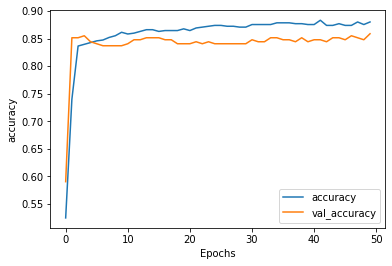

In [34]:
def plot_history(history, key):
  plt.plot(history.history[key])
  plt.plot(history.history['val_'+key])
  plt.xlabel("Epochs")
  plt.ylabel(key)
  plt.legend([key, 'val_'+key])
  plt.show()
# Plot the history
plot_history(history, 'accuracy')

#After adding batch normalization:

In [29]:
from keras.models import Sequential
from keras.layers import Dense, BatchNormalization

# define the model
classifier = Sequential()

# add the first hidden layer with batch normalization
classifier.add(Dense(units=8, activation='relu', input_dim=11, kernel_initializer='uniform'))
classifier.add(BatchNormalization())

# add the second hidden layer with batch normalization
classifier.add(Dense(units=16, activation='relu', kernel_initializer='uniform'))
classifier.add(BatchNormalization())

# add the output layer with sigmoid activation function
classifier.add(Dense(units=1, activation='sigmoid', kernel_initializer='uniform'))

# compile the model
classifier.compile(optimizer='rmsprop', loss='binary_crossentropy', metrics=['accuracy'])

In [30]:
history2 = classifier.fit(X_train, y_train, batch_size=16, epochs=50, validation_data=(X_test, y_test))

Epoch 1/50
41/41 [==============================] - 2s 10ms/step - loss: 0.5858 - accuracy: 0.7866 - val_loss: 0.6860 - val_accuracy: 0.5906
Epoch 2/50
41/41 [==============================] - 0s 5ms/step - loss: 0.4476 - accuracy: 0.8318 - val_loss: 0.6735 - val_accuracy: 0.6014
Epoch 3/50
41/41 [==============================] - 0s 4ms/step - loss: 0.3921 - accuracy: 0.8427 - val_loss: 0.6551 - val_accuracy: 0.6159
Epoch 4/50
41/41 [==============================] - 0s 4ms/step - loss: 0.3683 - accuracy: 0.8567 - val_loss: 0.6353 - val_accuracy: 0.7283
Epoch 5/50
41/41 [==============================] - 0s 5ms/step - loss: 0.3757 - accuracy: 0.8474 - val_loss: 0.6082 - val_accuracy: 0.7935
Epoch 6/50
41/41 [==============================] - 0s 5ms/step - loss: 0.3576 - accuracy: 0.8723 - val_loss: 0.5821 - val_accuracy: 0.7935
Epoch 7/50
41/41 [==============================] - 0s 4ms/step - loss: 0.3448 - accuracy: 0.8692 - val_loss: 0.5377 - val_accuracy: 0.8297
Epoch 8/50
41/41 [=

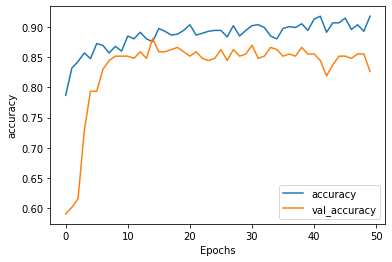

In [31]:
def plot_history(history2, key):
  plt.plot(history2.history[key])
  plt.plot(history2.history['val_'+key])
  plt.xlabel("Epochs")
  plt.ylabel(key)
  plt.legend([key, 'val_'+key])
  plt.show()
# Plot the history
plot_history(history2, 'accuracy')

After adding batch normalization on ANN , we can see the following effects:

* **Faster convergence**:By normalizing the inputs to each layer, Batch normalization allows the network to more easily learn the weights and biases required to perform the task. 
*  **Better generalization**: it reduces overfitting by adding noise to the input data and thus making the network less sensitive to small changes in the input, improving its ability to generalize to new data .
* **Reduced dependence on initialization**: It reduces the dependence of the network on the initial values of the weights and biases and helps it become more robust to changes in the data distribution.
* **Higher learning rates**:Enables the use of higher learning rates, which can accelerate the training process and improve the final performance of the network.
* **Stable gradients** :The probelm of vanishing and exploding gradients is reduced by batch normalization by stabilizing mean and variance of activation







#Fashion mnist dataset

In [8]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers

# Load the Fashion MNIST dataset
(x_train, y_train), (x_test, y_test) = keras.datasets.fashion_mnist.load_data()

# Preprocess the data
x_train = x_train.astype("float32") / 255.0
x_test = x_test.astype("float32") / 255.0


In [ ]:
model = keras.Sequential([
    layers.Flatten(input_shape=(28, 28)),
    layers.Dense(128, activation="relu"),
    layers.Dense(10,activation='softmax')
])

In [ ]:
# Compile the model
model.compile(
    optimizer="adam",
    loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
    metrics=["accuracy"],
)

In [10]:
history4 = model.fit(x_train, y_train, batch_size=16, epochs=20, validation_data=(x_test, y_test))

Epoch 1/20
3750/3750 [==============================] - 22s 6ms/step - loss: 0.3967 - accuracy: 0.8568 - val_loss: 0.3874 - val_accuracy: 0.8629
Epoch 2/20
3750/3750 [==============================] - 21s 6ms/step - loss: 0.3431 - accuracy: 0.8731 - val_loss: 0.3891 - val_accuracy: 0.8613
Epoch 3/20
3750/3750 [==============================] - 24s 6ms/step - loss: 0.3163 - accuracy: 0.8843 - val_loss: 0.3727 - val_accuracy: 0.8666
Epoch 4/20
3750/3750 [==============================] - 30s 8ms/step - loss: 0.2964 - accuracy: 0.8892 - val_loss: 0.3689 - val_accuracy: 0.8674
Epoch 5/20
3750/3750 [==============================] - 22s 6ms/step - loss: 0.2823 - accuracy: 0.8945 - val_loss: 0.3458 - val_accuracy: 0.8771
Epoch 6/20
3750/3750 [==============================] - 23s 6ms/step - loss: 0.2685 - accuracy: 0.9004 - val_loss: 0.3746 - val_accuracy: 0.8680
Epoch 7/20
3750/3750 [==============================] - 20s 5ms/step - loss: 0.2570 - accuracy: 0.9041 - val_loss: 0.3639 - val_ac

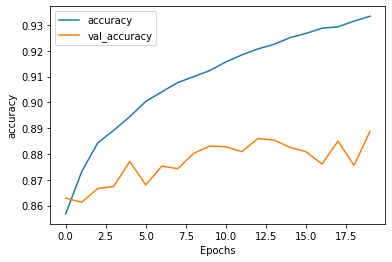

In [11]:
def plot_history(history4, key):
  plt.plot(history4.history[key])
  plt.plot(history4.history['val_'+key])
  plt.xlabel("Epochs")
  plt.ylabel(key)
  plt.legend([key, 'val_'+key])
  plt.show()
# Plot the history
plot_history(history4, 'accuracy')

In [12]:
# Evaluate the model
test_loss, test_acc = model.evaluate(x_test, y_test, verbose=2)
print("\nTest accuracy:", test_acc)

/usr/local/lib/python3.8/dist-packages/keras/backend.py:5585: UserWarning: "`sparse_categorical_crossentropy` received `from_logits=True`, but the `output` argument was produced by a Softmax activation and thus does not represent logits. Was this intended?
  output, from_logits = _get_logits(


313/313 - 1s - loss: 0.3661 - accuracy: 0.8888 - 844ms/epoch - 3ms/step

Test accuracy: 0.8888000249862671


**After applying batch normalization**

In [19]:
model = keras.Sequential([
    layers.Flatten(input_shape=(28, 28)),
    layers.Dense(128),
    layers.BatchNormalization(),
    layers.Activation('relu'),
    layers.Dense(10),
    layers.BatchNormalization(),
    layers.Activation('softmax')
])

In [21]:
# Compile the model
model.compile(
    optimizer="rmsprop",
    loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=False),
    metrics=["accuracy"],
)

In [22]:
# Train the model
history_new=model.fit(x_train, y_train, epochs=15, validation_data=(x_test, y_test))

Epoch 1/15
1875/1875 [==============================] - 12s 6ms/step - loss: 0.6235 - accuracy: 0.8198 - val_loss: 0.4944 - val_accuracy: 0.8331
Epoch 2/15
1875/1875 [==============================] - 11s 6ms/step - loss: 0.4468 - accuracy: 0.8547 - val_loss: 0.4441 - val_accuracy: 0.8528
Epoch 3/15
1875/1875 [==============================] - 12s 7ms/step - loss: 0.3918 - accuracy: 0.8678 - val_loss: 0.4037 - val_accuracy: 0.8584
Epoch 4/15
1875/1875 [==============================] - 15s 8ms/step - loss: 0.3592 - accuracy: 0.8773 - val_loss: 0.3751 - val_accuracy: 0.8694
Epoch 5/15
1875/1875 [==============================] - 16s 8ms/step - loss: 0.3356 - accuracy: 0.8843 - val_loss: 0.4162 - val_accuracy: 0.8606
Epoch 6/15
1875/1875 [==============================] - 12s 6ms/step - loss: 0.3167 - accuracy: 0.8902 - val_loss: 0.3643 - val_accuracy: 0.8742
Epoch 7/15
1875/1875 [==============================] - 15s 8ms/step - loss: 0.3042 - accuracy: 0.8938 - val_loss: 0.3963 - val_ac

In [23]:
# Evaluate the model
test_loss, test_acc = model.evaluate(x_test, y_test, verbose=2)
print("\nTest accuracy:", test_acc)

313/313 - 1s - loss: 0.3521 - accuracy: 0.8815 - 629ms/epoch - 2ms/step

Test accuracy: 0.8815000057220459


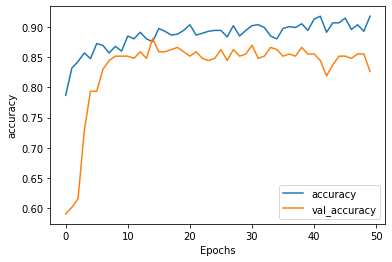

In [ ]:
def plot_history(history_new, key):
  plt.plot(history_new.history[key])
  plt.plot(history_new.history['val_'+key])
  plt.xlabel("Epochs")
  plt.ylabel(key)
  plt.legend([key, 'val_'+key])
  plt.show()
# Plot the history
plot_history(history_new, 'accuracy')

**After applying Batch normalization**:
whether the model overfits or underfits after applying batch normalization depends on a variety of factors, such as the size of the model, the amount of regularization used, and the complexity of the dataset. In general, however, batch normalization can help to reduce overfitting by improving the training stability and reducing the internal covariate shift and reducing the problem of exploding and vanishing gradient descent. So it is more likely that the model will underfit rather than overfit after applying batch normalization, especially if the regularization is not too strong.

**The batch normalization in this dataset also shows the same effect as mentioned above in the heart dataset**